<a href="https://colab.research.google.com/github/varuliant2022/33218010/blob/main/Final2_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS INDIVIDUAL #1.A EL 7007:** Eksplorasi Hyperparameter Convolutional Neural Network dalam proses klasifikasi 

**Nama : Varuliantor Dear NIM 33218010**

*Inisiasi system dengan melakukan import library yang dibutuhkan*

In [20]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import datasets, layers, models, optimizers
from keras import datasets
from keras import layers
from keras import models
from keras import losses 
from keras import optimizers 
from keras import metrics 
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std


*Menyiapkan Dataset dari CIFAR 10 sebagai data training dan data test*

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Klasifikasi dan Verifikasi Dataset yang digunakan

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,  # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Membuat based Model CNN dengan dua convotunial hidden layer

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


Memeriksa model yang dibuat

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

Menambahkan Dense Layer

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10,activation='relu'))

Periksa kembali based model yang telah dibangun dengan menambahkan Dense layer

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

**COMPILE dan LATIH MODEL** yang dibangun untuk analisis performa (**PILIH SALAH SATU OPSI** untuk pengujian yang dibutuhkan)

OPSI PERTAMA 

**Probabilistic CategoricalCrossEntropy**

In [18]:
# Opsi satu CategoricalCrossEntropy
model.compile(optimizer='Adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Agar dapat memeriksa dengan tipe loss probability CategoricalCrossentropy maka digunakan kode dibawah ini dengan megubah calsifikasi tipe integers menjadi one hot representation

In [ ]:
from tensorflow.keras.utils import to_categorical #impor fungsi to_categorical agar fiting process dapat dilakuakn
epochs=10
history= model.fit(train_images,to_categorical(train_labels),epochs=epochs)#, validation_data=(test_images, to_categorical(test_labels)), verbose=2)

In [ ]:
history_dict = history.history   # Memeriksa fitur yang ada di history agar bisa dibuat plotnya
print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(epochs)

plt.figure(figsize=(4, 4))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
#plt.ylim([0.1, 1])
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss, Adam, CategoricalCrossentropy')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  to_categorical(test_labels), verbose=2)
print(test_acc)

OPSI KEDUA 

**Probilistic SparseCategoricalCrossEntropy**

In [27]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


**Probabilistic Loss Poisson**

In [ ]:
model.compile(optimizer='Adam',loss=tf.keras.losses.Poisson(),metrics=['accuracy'])

**Probabilistic Loss BinaryCrossEntropy**

In [ ]:
model.compile(optimizer='Adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

**Probabilistic Loss KL Divergence**

In [ ]:
model.compile(optimizer='Adam',loss=tf.keras.losses.KLDivergence(),metrics=['accuracy'])

SETING TIPE OPTIMIZER  dan learning rate (Option untuk variabel learning rate bukan Default)

**UNTUK MENGUJI LEARNING RATE**

In [11]:
opt = keras.optimizers.Adam(learning_rate=0.05)
epochs=10
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**MODEL FIT untuk test performa**

In [28]:


epochs=10
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.7679 - accuracy: 0.3527 - val_loss: 1.3941 - val_accuracy: 0.4884
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.3317 - accuracy: 0.5173 - val_loss: 1.2826 - val_accuracy: 0.5337
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1999 - accuracy: 0.5703 - val_loss: 1.1804 - val_accuracy: 0.5821
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1096 - accuracy: 0.6050 - val_loss: 1.1265 - val_accuracy: 0.5991
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0416 - accuracy: 0.6300 - val_loss: 1.0811 - val_accuracy: 0.6136
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9884 - accuracy: 0.6498 - val_loss: 1.0391 - val_accuracy: 0.6314
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9416 - accuracy: 0.6689 - val_loss: 1.0171 -

**Evaluasi Model dan Plot hasil**

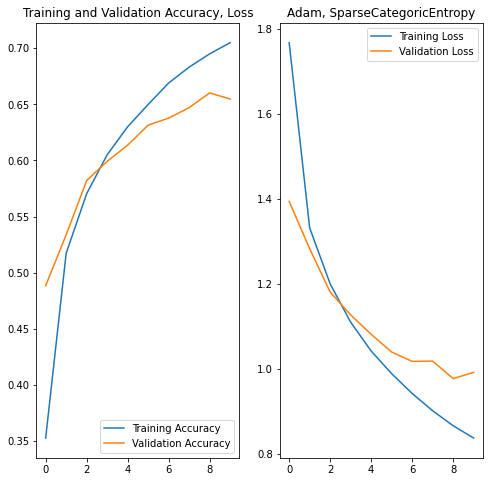

313/313 - 4s - loss: 0.9913 - accuracy: 0.6547 - 4s/epoch - 12ms/step
0.654699981212616


In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.ylim([0.1, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.ylim([0.1, 1])
plt.legend(loc='upper right')
plt.title('Adam, SparseCategoricEntropy')
plt.show()


test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Periksa Akurasi

In [ ]:
#print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
#plt.boxplot(scores)
#plt.show()

**TEST MODEL **yang dibangun dengan Image sendiri


Saving rusa.png to rusa.png


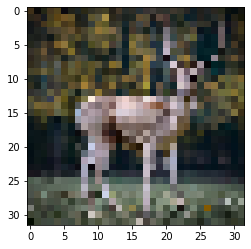

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()  #Pilih file yang diinginkan
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32))   # Memaksa ukuran image sesuai dengan dimensi yang diperlukan
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  plt.imshow(img)
 
  images = np.vstack([x])

  prediction_scores = model.predict(np.expand_dims(img, axis=0))
  #classes = model.predict(images, batch_size=10)
  #print(classes[0])
  

In [ ]:
print(prediction_scores)
#print(class_names)# = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
score = tf.nn.softmax(prediction_scores[0])
predicted_index = np.argmax(prediction_scores)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)],  np.max(score))
)

[[ 3574.1099  5073.635   3365.7065  1304.514   1346.8253  2594.3596
  -5399.4146  4955.9224  1398.4666  8449.8   ]]
This image most likely belongs to truck with a 1.00 percent confidence.


Cara lain untuk menampilkan gambar yang diuploaded dari local folder 

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()

In [ ]:
# Read img uploaded file
img=cv2.imread('deer2.png')
img-cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
#atau dengan matplotlib
import matplotlib.image as mpimg
img=mpimg.imread('deer2.png')
plt.imshow(img)


In [ ]:
#Loading the image 
from PIL import Image
import numpy as np
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('deer2.png')

TRAINING MODEL KEDUA (OPTIONAL)

In [ ]:
#training model
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), batch_size = 150, epochs = 10)


334/334 [==============================] - 62s 185ms/step - loss: 0.6519 - accuracy: 0.7686 - val_loss: 0.8867 - val_accuracy: 0.7008


In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)